# An Analysis of State Relevance on International Affairs through their Relevance in Armed Conflict

## A.

Analyses of states in terms of their international relevance usually revolve traditional analyses of measures such as their economy, military power, and diplomatic endeavors. This however does not take into account their relation in armed conflict around the world. Participation in conflict is arguably an important measure to take into account. Direct analysis of individual conflicts however is not enough and will not reflect that conflict and the states' involved impact on the international stage.

## B.
Using the PageRank algorithm we can create a network of states connected via their history of conflict between other states. Through this we can use the PageRank algorithm to determine a state's importance overall. What is solved here is that we do not only analyze local relevance, but rather the importance of state globally.

## C.

As mentioned, this will help in providing quantifiable data on a state's global relevance. Through this project we can find states that have the most relevance in terms of armed conflict. Hopefully the data found in this project will coincide with other metrics, as well as provide new insight.

# Collecting the Data

In [1]:
import os
import pandas as pd
import numpy as np
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib

In [2]:
import os
import pandas as pd
import numpy as np
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

zip_url = 'https://ucdp.uu.se/downloads/ucdpprio/ucdp-prio-acd-251-csv.zip'
zip_filename = 'ucdp-prio-acd-251-csv.zip'
csv_filename = 'UcdpPrioConflict_v25_1.csv'
useful_columns = ['side_a', 'side_a_id', 'side_b', 'side_b_id']

sides_df = None
try:
    # Download zip, store as bytes object
    zip_data = None
    with urlopen(zip_url) as zip_response:
        zip_data = BytesIO(zip_response.read())

    # Extract csv from zip, store as dataframe
    with ZipFile(zip_data, 'r') as zip_file:
        with zip_file.open(csv_filename) as csv_file:
            sides_df = pd.read_csv(csv_file, usecols=useful_columns)

except Exception as e:
    print(f"An error occurred: {e}")

In [3]:
sides_df

,side_a,side_a_id,side_b,side_b_id
0,Government of India,141,GNLA,1163
1,Government of India,141,GNLA,1163
2,Government of Egypt,117,Government of Israel,121
3,Government of Egypt,117,Government of Israel,121
4,Government of Egypt,117,Government of Israel,121
...,...,...,...,...
2747,Government of Myanmar (Burma),144,LNUP,889
2748,Government of Myanmar (Burma),144,LNUP,889
2749,Government of Myanmar (Burma),144,LNUP,889
2750,Government of Myanmar (Burma),144,LNUP,889


# Creating the Network

In [4]:
from pyvis.network import Network

net = Network(notebook=True, height="750px", width="100%", bgcolor="#222222", font_color="white")

# Add edges from DataFrame
for _, row in sides_df.iterrows():
    net.add_node(row["side_a"], label=row["side_a"])
    net.add_node(row["side_b"], label=row["side_b"])
    net.add_edge(row["side_a"], row["side_b"])

# Show network
net.show("network.html")


network.html


In [5]:
edges = sides_df.groupby(["side_a", "side_b"]).size().reset_index(name="weight")

G = nx.from_pandas_edgelist(edges, "side_a", "side_b", edge_attr="weight")

pr = nx.pagerank(G, weight="weight")

In [6]:
pr_df = pd.DataFrame(pr.items(), columns=["node", "pagerank"])

In [7]:
pr_df = pr_df.sort_values("pagerank", ascending=False)

# Visualization

In [8]:
norm = mcolors.Normalize(vmin=pr_df["pagerank"].min(), vmax=pr_df["pagerank"].max())
cmap = matplotlib.colormaps["coolwarm"]

net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

for _, row in pr_df.iterrows():
    color = mcolors.to_hex(cmap(norm(row["pagerank"])))
    net.add_node(
        row["node"],
        label=row["node"],
        size=row["pagerank"] * 2000,   # scale factor, adjust as needed
        color=color,
        title=f"PageRank: {row['pagerank']:.4f}"  # tooltip
    )

for _, row in edges.iterrows():
    if row["side_a"] in pr and row["side_b"] in pr:  # ensure nodes exist
        net.add_edge(
            row["side_a"],
            row["side_b"],
            value=row["weight"]  # edge thickness
        )

net.write_html("network.html")


In [9]:
from IPython.display import IFrame
IFrame("network.html", width="100%", height="750px")


# Highest PageRank Values

In [10]:
pr_df.head(10)

,node,pagerank
144,Government of Myanmar (Burma),0.030307
17,IS,0.024113
143,Government of India,0.022715
227,Government of Ethiopia,0.019596
622,Government of Sudan,0.014034
112,Government of Chad,0.014009
179,Government of DR Congo (Zaire),0.013843
216,Government of Israel,0.012967
547,Government of Philippines,0.012919
0,Government of Afghanistan,0.012501


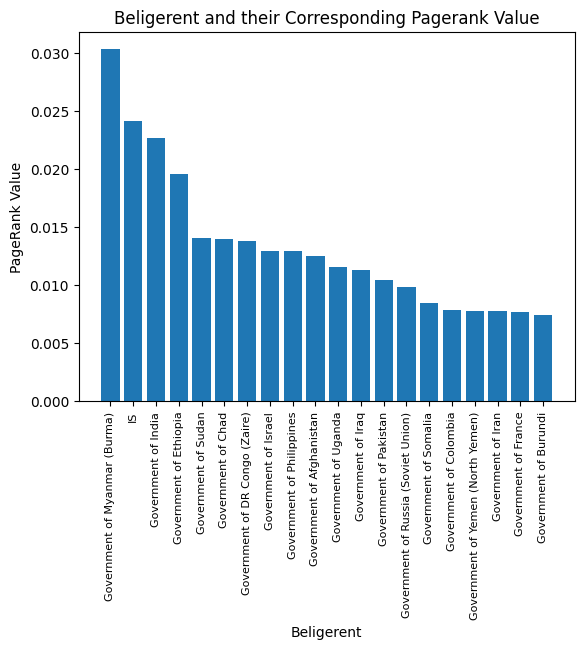

In [11]:
plt.bar(pr_df.head(20)["node"], pr_df.head(20)["pagerank"] )
plt.xticks(rotation=90, fontsize=8)

plt.xlabel("Beligerent") 
plt.ylabel("PageRank Value")

plt.title("Beligerent and their Corresponding Pagerank Value")

plt.show()

# Interpretation and Conclusion